<a href="https://colab.research.google.com/github/Deepeck05/Artificial_Inteligence_Project/blob/main/KNN_prediction_diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing all the libraries we need***

In [126]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import seaborn as sns


In [127]:
diabeties_dataset=pd.read_csv("diabetes_prediction_dataset.csv")

In [128]:
diabeties_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# ***Data Understanding***

In [129]:
diabeties_dataset.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [130]:
diabeties_dataset.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [131]:
diabeties_dataset.duplicated().sum()

np.int64(3854)

In [136]:
diabeties_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [135]:
diabeties_dataset.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


# ***Making a copy of the orginal dataframe***

In [134]:
diabeties_dataset_copie=diabeties_dataset.copy()
diabeties_dataset_copie.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# ***Encoding the columns of datatype  Object***

In [137]:
labl_encdr=LabelEncoder()
diabeties_dataset_copie['gender']=labl_encdr.fit_transform(diabeties_dataset_copie['gender'])
diabeties_dataset_copie['smoking_history']=labl_encdr.fit_transform(diabeties_dataset_copie['smoking_history'])

In [138]:
diabeties_dataset_copie['gender'].unique()
diabeties_dataset_copie['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

#***Creating the features for the predict_diabeties***

In [139]:
x=diabeties_dataset_copie.drop("diabetes",axis=1)
y=diabeties_dataset_copie["diabetes"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#***predict_diabeties Training***

In [140]:
predict_diabeties=KNeighborsClassifier(n_neighbors=4)
predict_diabeties.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#***predict_diabeties predicting***

In [141]:
y_pred=predict_diabeties.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


#***Accuracy of the predict_diabeties***
#***&***
#***Classification_Report of the predict_diabeties***

In [142]:
from sklearn.metrics import classification_report
accuracy=predict_diabeties.score(x_test,y_test)
print(accuracy)
report_output=classification_report(y_test,y_pred)
print(report_output)

0.9533
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     18292
           1       0.94      0.48      0.64      1708

    accuracy                           0.95     20000
   macro avg       0.95      0.74      0.81     20000
weighted avg       0.95      0.95      0.95     20000



# ***Confusion Matrix Value***

In [143]:
#confusion matrix

cnfusn_mtrx=confusion_matrix(y_test,y_pred)
print(cnfusn_mtrx)


[[18238    54]
 [  880   828]]


# ***ROC Curve value***

In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_curve=roc_curve(y_test,y_pred)
print(roc_curve)

(array([0.        , 0.00295211, 1.        ]), array([0.        , 0.48477752, 1.        ]), array([inf,  1.,  0.]))


# ***Vishualize ROC Curve***

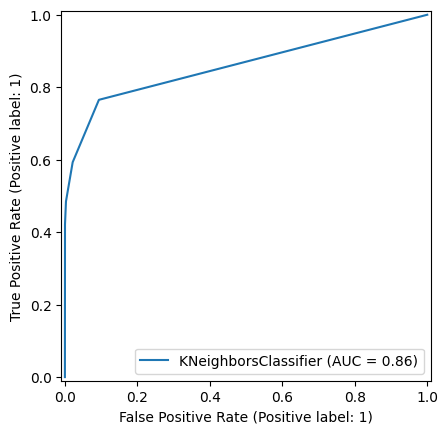

In [146]:
RocCurveDisplay.from_estimator(predict_diabeties, x_test, y_test)
plt.show()


# ***Visualize Confusion Matrix***

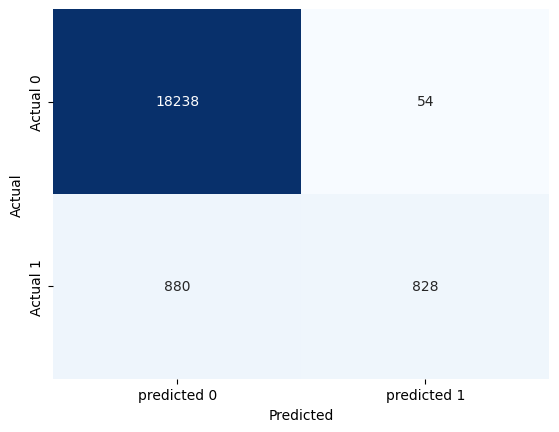

In [148]:
sns.heatmap(cnfusn_mtrx, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['predicted 0','predicted 1'],
              yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()